In [ ]:
#after madhu's kernel inlcusion
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log14.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_PyTorch_log9.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['tok_per_sec'], label='Pytorch', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Ours', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Trhoughput Comparison (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


print("Avg. Throughput Pytorch:",df_new['tok_per_sec'].mean())
print("Min Train Loss Pytorch:",df_new['loss'][:].min())
print("Min Val Loss Pytorch:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time Pytorch:",df_new['dt_ms'].mean())
# print("Avg. Data Time new:",df_new['timer_data'][:].mean())
# print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
# print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
# print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
# print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
# print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
# print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
# print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
# print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
# print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
# print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


print("\nAvg. Throughput ours:",df_old['tok_per_sec'].mean())
print("Min Train Loss ours:",df_old['loss'][:].min())
print("Min Val Loss ours:",df_old['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time ours:",df_old['dt_ms'].mean())
print("Avg. Data Time ours:",df_old['timer_data'][:].mean())
print("Avg. Forward Time ours:",df_old['timer_fwd'][:].mean())
print("Avg. Loss Time ours:",df_old['timer_loss'][:].mean())
print("Avg. Backward Time ours:",df_old['timer_bwd'][:].mean())
print("Avg. clip_grad Time ours:",df_old['timer_clip'][:].mean())
print("Avg. Optimizer Time ours:",df_old['timer_optim'][:].mean())
print("Avg. Tok_Emb Time ours:",df_old['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time ours:",df_old['timer_pos_emb'].mean())
print("Avg. Mlp Time ours:",df_old['timer_mlp'][:].mean())
print("Avg. Ln_f Time ours:",df_old['timer_ln_f'][:].mean())
print("Avg. LM Head Time ours:",df_old['timer_lm_head'][:].mean())

FileNotFoundError: [Errno 2] No such file or directory: '/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log14.csv'

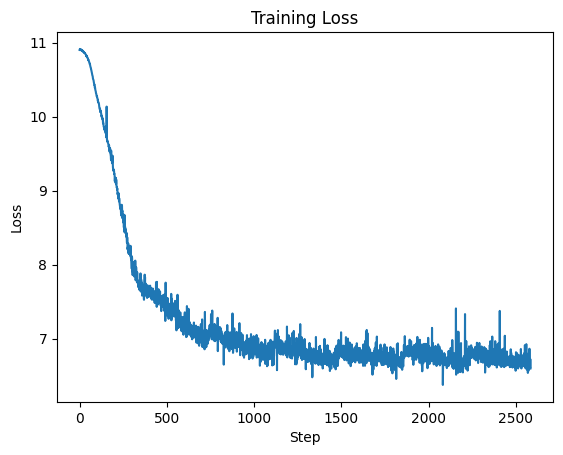

In [330]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/CPP_Training__log10.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

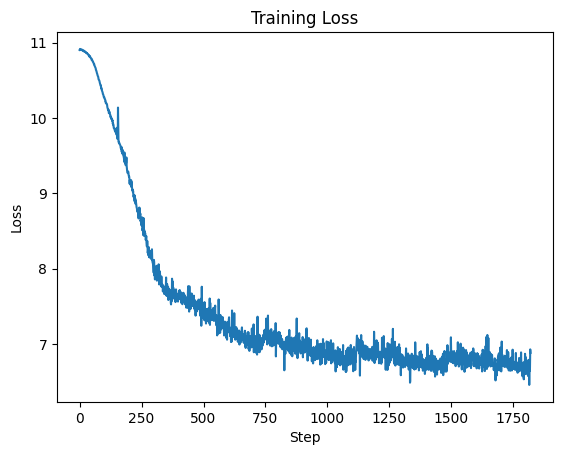

In [329]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/CPP_Training__log12.csv')

plt.plot(df['step'].to_numpy(), df['loss'].to_numpy())

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.savefig('loss_curve.png')

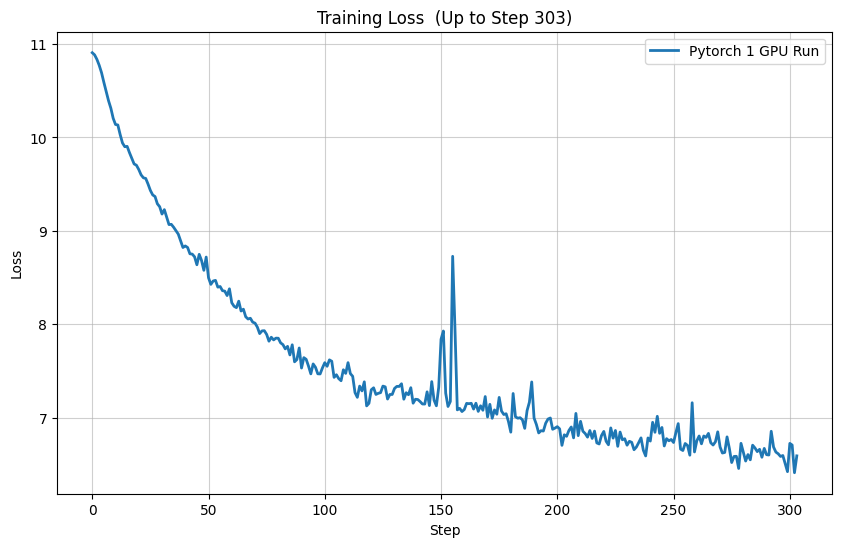

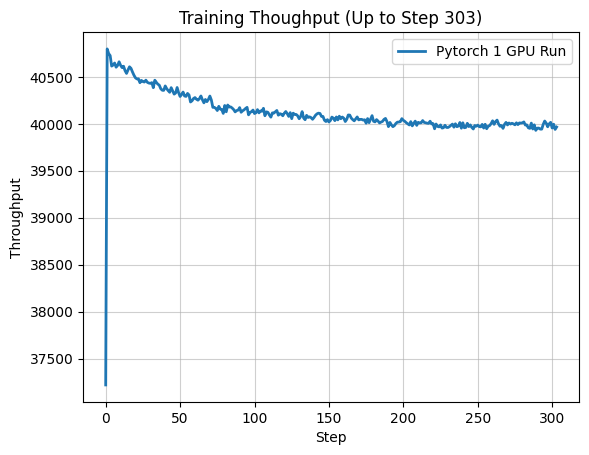

Max. Throughput new: 40797.24232763932
Avg. Throughput new: 40121.78438968242
Min Train Loss new: 6.41043359041214


In [27]:


#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
# df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/gpt2_tp_test/TP_MLP_Torch_Logs/log_1771514240.csv')

if not df_old.empty:
    # df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
# df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Pytorch 1 GPU Run', linewidth=2)
# plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Synchronization Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss  (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Pytorch 1 GPU Run', linewidth=2)
# plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Synchronization Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
# print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
# print("Avg. Time new:",df_new['dt_ms'].mean())
# print("Avg. Data Time new:",df_new['timer_data'][:].mean())
# print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
# print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
# print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
# print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
# print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
# print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
# print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
# print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
# print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
# print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


# print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
# print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
# print("Min Train Loss old:",df_old_truncated['loss'][:].min())
# print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
# print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
# print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
# print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
# print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
# print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
# print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
# print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
# print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
# print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
# print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
# print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
# print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

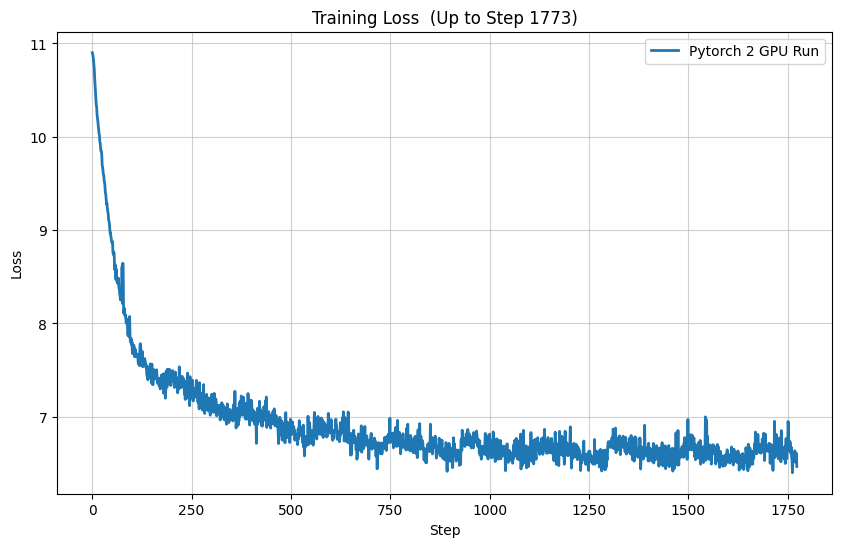

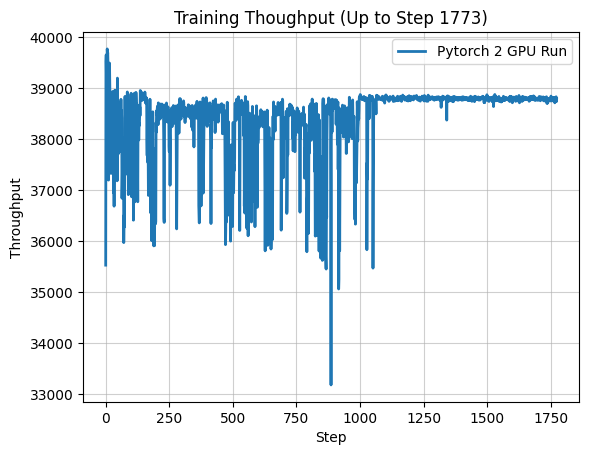

Max. Throughput new: 39770.67260144688
Avg. Throughput new: 38391.72775291675
Min Train Loss new: 6.400197267532349


In [72]:


#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
# df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/gpt2_tp_test/TP_MLP_Torch_Logs/Pytorch_TP_log.csv')

if not df_old.empty:
    # df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
# df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Pytorch 2 GPU Run', linewidth=2)
# plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Old Synchronization Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss  (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Pytorch 2 GPU Run', linewidth=2)
# plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Old Synchronization Run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput new:",df_new['tok_per_sec'].max())
print("Avg. Throughput new:",df_new['tok_per_sec'].mean())
print("Min Train Loss new:",df_new['loss'][:].min())
# print("Min Val Loss new:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
# print("Avg. Time new:",df_new['dt_ms'].mean())
# print("Avg. Data Time new:",df_new['timer_data'][:].mean())
# print("Avg. Forward Time new:",df_new['timer_fwd'][:].mean())
# print("Avg. Loss Time new:",df_new['timer_loss'][:].mean())
# print("Avg. Backward Time new:",df_new['timer_bwd'][:].mean())
# print("Avg. clip_grad Time new:",df_new['timer_clip'][:].mean())
# print("Avg. Optimizer Time new:",df_new['timer_optim'][:].mean())
# print("Avg. Tok_Emb Time new:",df_new['timer_tok_emb'][:].mean())
# print("Avg. Pos_Emb Time new:",df_new['timer_pos_emb'].mean())
# print("Avg. Mlp Time new:",df_new['timer_mlp'][:].mean())
# print("Avg. Ln_f Time new:",df_new['timer_ln_f'][:].mean())
# print("Avg. LM Head Time new:",df_new['timer_lm_head'][:].mean())


# print("\nMax. Throughput old:",df_old_truncated['tok_per_sec'].max())
# print("Avg. Throughput old:",df_old_truncated['tok_per_sec'].mean())
# print("Min Train Loss old:",df_old_truncated['loss'][:].min())
# print("Min Val Loss old:",df_old_truncated['val_loss'].where(df_new['val_loss']!=(-1)).min())
# print("Avg. Time old:",df_old_truncated['dt_ms'].mean())
# print("Avg. Data Time old:",df_old_truncated['timer_data'][:].mean())
# print("Avg. Forward Time old:",df_old_truncated['timer_fwd'][:].mean())
# print("Avg. Loss Time old:",df_old_truncated['timer_loss'][:].mean())
# print("Avg. Backward Time old:",df_old_truncated['timer_bwd'][:].mean())
# print("Avg. clip_grad Time old:",df_old_truncated['timer_clip'][:].mean())
# print("Avg. Optimizer Time old:",df_old_truncated['timer_optim'][:].mean())
# print("Avg. Tok_Emb Time old:",df_old_truncated['timer_tok_emb'][:].mean())
# print("Avg. Pos_Emb Time old:",df_old_truncated['timer_pos_emb'].mean())
# print("Avg. Mlp Time old:",df_old_truncated['timer_mlp'][:].mean())
# print("Avg. Ln_f Time old:",df_old_truncated['timer_ln_f'][:].mean())
# print("Avg. LM Head Time old:",df_old_truncated['timer_lm_head'][:].mean())

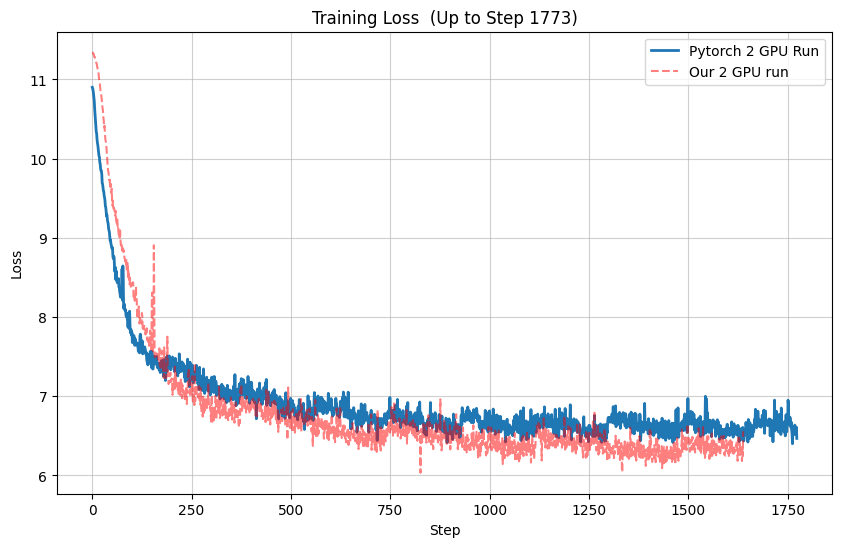

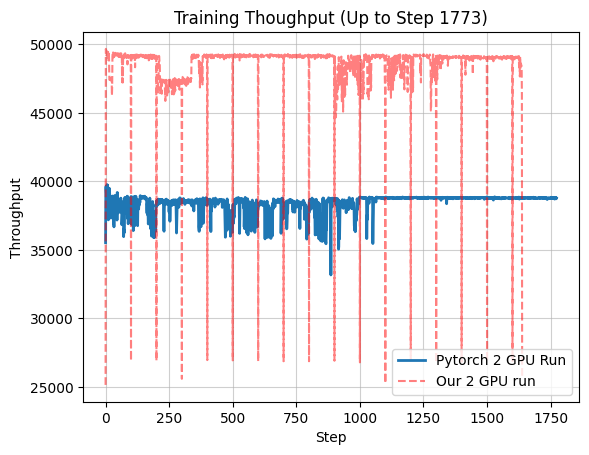

Max. Throughput Pytorch: 39770.67260144688
Avg. Throughput Pytorch: 38391.72775291675
Min Train Loss Pytorch: 6.400197267532349
Avg. Time Pytorch: 1707.6291180517117
Avg. Data Time Pytorch: 2.53049439505129
Avg. Forward Time Pytorch: 466.56635869315403
Avg. Loss Time Pytorch: 156.65794711344137
Avg. Backward Time Pytorch: 1073.5969619707969
Avg. clip_grad Time Pytorch: 1.8205875086408054
Avg. Optimizer Time Pytorch: 5.453804753678762
Avg. Tok_Emb Time Pytorch: 0.8377015339725115
Avg. Pos_Emb Time Pytorch: 0.18166591257398704
Avg. Mlp Time Pytorch: 124.20460011752105
Avg. Ln_f Time Pytorch: 0.8927375277275431
Avg. LM Head Time Pytorch: 338.3174584699457

Max. Throughput Ours: 49671.723452
Avg. Throughput Ours: 48519.54031831788
Min Train Loss Ours: 6.03402
Min Val Loss Ours: 6.359128
Avg. Time Ours: 1356.673410438072
Avg. Data Time Ours: 0.5477284978645516
Avg. Forward Time Ours: 409.7946456705308
Avg. Loss Time Ours: 40.4699595899939
Avg. Backward Time Ours: 839.0408482190359
Avg. clip

In [6]:


#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log4.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/gpt2_tp_test/TP_MLP_Torch_Logs/Pytorch_TP_log.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Pytorch 2 GPU Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Our 2 GPU run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss  (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Pytorch 2 GPU Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Our 2 GPU run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput Pytorch:",df_new['tok_per_sec'].max())
print("Avg. Throughput Pytorch:",df_new['tok_per_sec'].mean())
print("Min Train Loss Pytorch:",df_new['loss'][:].min())
# print("Min Val Loss Pytorch:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time Pytorch:",df_new['dt_ms'].mean())
print("Avg. Data Time Pytorch:",df_new['timer_data'][:].mean())
print("Avg. Forward Time Pytorch:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time Pytorch:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time Pytorch:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time Pytorch:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time Pytorch:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time Pytorch:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time Pytorch:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time Pytorch:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time Pytorch:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time Pytorch:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput Ours:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput Ours:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss Ours:",df_old_truncated['loss'][:].min())
print("Min Val Loss Ours:",df_old_truncated['val_loss'].where(df_old['val_loss']!=(-1)).min())
print("Avg. Time Ours:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time Ours:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time Ours:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time Ours:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time Ours:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time Ours:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time Ours:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time Ours:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time Ours:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time Ours:",df_old_truncated['timer_mlp'][:].mean())
print("Avg. Ln_f Time Ours:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time Ours:",df_old_truncated['timer_lm_head'][:].mean())

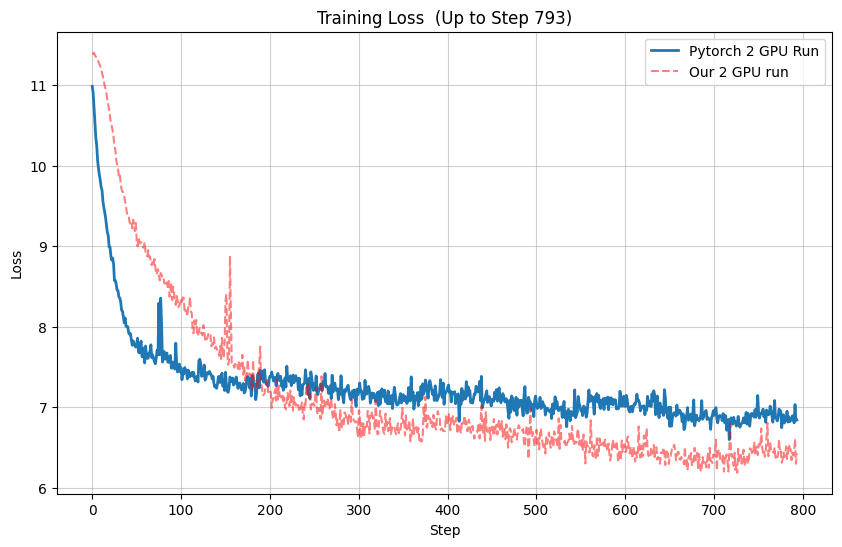

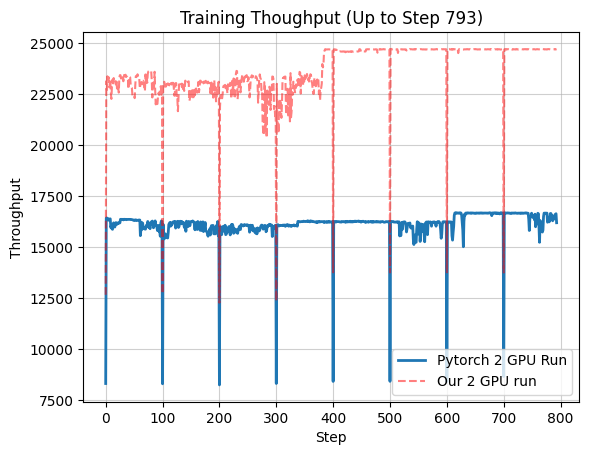

Max. Throughput Pytorch: 16683.662646829092
Avg. Throughput Pytorch: 16121.301530118446
Min Train Loss Pytorch: 6.597982227802277
Min Val Loss Pytorch: 6.942407131195068
Avg. Time Pytorch: 4084.8096281815538
Avg. Data Time Pytorch: 2.650280464037089
Avg. Forward Time Pytorch: 1323.010344574974
Avg. Loss Time Pytorch: 156.77780316398486
Avg. Backward Time Pytorch: 2548.2506392164255
Avg. clip_grad Time Pytorch: 3.5471658262257613
Avg. Optimizer Time Pytorch: 11.49816343946481
Avg. Tok_Emb Time Pytorch: 1.343065307463897
Avg. Pos_Emb Time Pytorch: 0.263063857662644
Avg. Mlp Time Pytorch: 639.2315548529252
Avg. Ln_f Time Pytorch: 1.988227466454434
Avg. LM Head Time Pytorch: 710.7517009706281

Max. Throughput Ours: 24708.14196
Avg. Throughput Ours: 23686.34678637909
Min Train Loss Ours: 6.186806
Min Val Loss Ours: 6.484126
Avg. Time Ours: 2781.8561922581866
Avg. Data Time Ours: 0.3142620856423174
Avg. Forward Time Ours: 902.8040670491183
Avg. Loss Time Ours: 40.30529668010076
Avg. Backward

In [143]:


#with sync hook method nsys
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_old = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/TP_MLP_Training_logs/TP_MLP_Training_log12.csv')
df_new = pd.read_csv('/home/blu-bridge25/Study/Code/TensorParallelismBeta/DTensor/gpt2_tp_test/TP_MLP_Torch_Logs/TP_MLP_Training_log1.csv')

if not df_old.empty:
    df_old.columns = df_old.columns.str.strip()
    df_new.columns = df_new.columns.str.strip()

# 1. Get the current progress (max step of the new run)
current_max_step = df_new['step'].max()

# 2. Filter the old run to match the current progress
df_old_truncated = df_old[df_old['step'] <= current_max_step]

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.plot(df_new['step'], df_new['loss'], label='Pytorch 2 GPU Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['loss'], label='Our 2 GPU run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title(f'Training Loss  (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()


plt.plot(df_new['step'], df_new['tok_per_sec'], label='Pytorch 2 GPU Run', linewidth=2)
plt.plot(df_old_truncated['step'], df_old_truncated['tok_per_sec'], label='Our 2 GPU run', linestyle = "--", color = "red", alpha=0.5)

plt.xlabel('Step')
plt.ylabel('Throughput')
plt.title(f'Training Thoughput (Up to Step {current_max_step})')
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)

plt.savefig('comparison_curve.png')
plt.show()

print("Max. Throughput Pytorch:",df_new['tok_per_sec'].max())
print("Avg. Throughput Pytorch:",df_new['tok_per_sec'].mean())
print("Min Train Loss Pytorch:",df_new['loss'][:].min())
print("Min Val Loss Pytorch:",df_new['val_loss'].where(df_new['val_loss']!=(-1)).min())
print("Avg. Time Pytorch:",df_new['dt_ms'].mean())
print("Avg. Data Time Pytorch:",df_new['timer_data'][:].mean())
print("Avg. Forward Time Pytorch:",df_new['timer_fwd'][:].mean())
print("Avg. Loss Time Pytorch:",df_new['timer_loss'][:].mean())
print("Avg. Backward Time Pytorch:",df_new['timer_bwd'][:].mean())
print("Avg. clip_grad Time Pytorch:",df_new['timer_clip'][:].mean())
print("Avg. Optimizer Time Pytorch:",df_new['timer_optim'][:].mean())
print("Avg. Tok_Emb Time Pytorch:",df_new['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time Pytorch:",df_new['timer_pos_emb'].mean())
print("Avg. Mlp Time Pytorch:",df_new['timer_mlp'][:].mean())
print("Avg. Ln_f Time Pytorch:",df_new['timer_ln_f'][:].mean())
print("Avg. LM Head Time Pytorch:",df_new['timer_lm_head'][:].mean())


print("\nMax. Throughput Ours:",df_old_truncated['tok_per_sec'].max())
print("Avg. Throughput Ours:",df_old_truncated['tok_per_sec'].mean())
print("Min Train Loss Ours:",df_old_truncated['loss'][:].min())
print("Min Val Loss Ours:",df_old_truncated['val_loss'].where(df_old['val_loss']!=(-1)).min())
print("Avg. Time Ours:",df_old_truncated['dt_ms'].mean())
print("Avg. Data Time Ours:",df_old_truncated['timer_data'][:].mean())
print("Avg. Forward Time Ours:",df_old_truncated['timer_fwd'][:].mean())
print("Avg. Loss Time Ours:",df_old_truncated['timer_loss'][:].mean())
print("Avg. Backward Time Ours:",df_old_truncated['timer_bwd'][:].mean())
print("Avg. clip_grad Time Ours:",df_old_truncated['timer_clip'][:].mean())
print("Avg. Optimizer Time Ours:",df_old_truncated['timer_optim'][:].mean())
print("Avg. Tok_Emb Time Ours:",df_old_truncated['timer_tok_emb'][:].mean())
print("Avg. Pos_Emb Time Ours:",df_old_truncated['timer_pos_emb'].mean())
print("Avg. Mlp Time Ours:",df_old_truncated['timer_mlp'][:].mean())

print("Avg. Ln_f Time Ours:",df_old_truncated['timer_ln_f'][:].mean())
print("Avg. LM Head Time Ours:",df_old_truncated['timer_lm_head'][:].mean())